In [3]:
import pandas as pd
import numpy as np

In [4]:
#data = pd.read_csv("../../merged_dataset_ellie.csv")
data = pd.read_csv("../../data/combined_jun22_train.csv", encoding = "ISO-8859-1")

In [5]:
pd.set_option('max_columns', None)

In [6]:
data.sample(10)

,Unnamed: 0,ID,YEAR_FIPS,YEAR,STATE_FIPS,COUNTY_FIPS,STATE,COUNTY,REP_CANDIDATE,DEM_CANDIDATE,REP_VOTES,DEM_VOTES,COUNTY_TOTALVOTES,WINNING_CANDIDATE,WINNING_PARTY,WINNING_PARTY_BINARY,HOUSE_WINNING_BINARY,SENATE_WINNING_BINARY,UNEMPLOYMENT_RATE,AVG_WAGE_SALARY,AA_FEMALE,AA_MALE,BA_FEMALE,BA_MALE,H_FEMALE,H_MALE,IA_FEMALE,IA_MALE,NA_FEMALE,NA_MALE,TOT_FEMALE,TOT_MALE,TOT_POP,WA_FEMALE,WA_MALE,TOT_POP_LESS19,TOT_MALE_LESS19,TOT_FEMALE_LESS19,TOT_POP_20to39,TOT_MALE_20to39,TOT_FEMALE_20to39,TOT_POP_40to59,TOT_MALE_40to59,TOT_FEMALE_40to59,TOT_POP_Above60,TOT_MALE_Above60,TOT_FEMALE_Above60,AA_FEMALE%,AA_MALE%,BA_FEMALE%,BA_MALE%,H_FEMALE%,H_MALE%,IA_FEMALE%,IA_MALE%,NA_FEMALE%,NA_MALE%,WA_FEMALE%,WA_MALE%,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,MARGIN_VICTORY,TRAIN
4235,4235,4606,201622071,2016,22,71,Louisiana,Orleans Parish,Donald Trump,Hillary Clinton,24292.0,133996.0,165812.0,Hillary Clinton,democrat,0,1,1,5.9,151464.0,5614,5534,126132,106710,9419,11258,590,738,109,149,200441,183489,383930,65018,67765,88156,44430,43726,125685,60041,65644,99227,47874,51353,70862,31144,39718,0.014622,0.014414,0.328529,0.277941,0.024533,0.029323,0.001537,0.001922,0.000284,0.000388,0.169349,0.176504,0.522077,0.477923,0.229615,0.327364,0.258451,0.184570,0.661617,0
14679,14679,17964,200847059,2008,47,59,Tennessee,Greene County,John McCain,Barack Obama,17151.0,7110.0,24670.0,John McCain,republican,1,1,1,9.3,0.0,127,112,679,719,627,863,106,76,21,29,34562,33278,67840,33320,32058,16483,8543,7940,16045,8142,7903,19917,9716,10201,15395,6877,8518,0.001872,0.001651,0.010009,0.010598,0.009242,0.012721,0.001563,0.001120,0.000310,0.000427,0.491156,0.472553,0.509463,0.490537,0.242969,0.236512,0.293588,0.226931,-0.407013,0
2503,2503,2872,201241065,2012,41,65,Oregon,Wasco County,Mitt Romney,Barack Obama,5229.0,5211.0,10873.0,Mitt Romney,republican,1,0,-1,8.4,36244.0,121,85,51,68,1782,2016,589,617,86,78,12748,12537,25285,11656,11413,6483,3325,3158,5638,2856,2782,6853,3391,3462,6311,2965,3346,0.004785,0.003362,0.002017,0.002689,0.070477,0.079731,0.023294,0.024402,0.003401,0.003085,0.460985,0.451374,0.504172,0.495828,0.256397,0.222978,0.271030,0.249595,-0.001655,0
6700,6700,9899,200018051,2000,18,51,Indiana,Gibson County,George W. Bush,Al Gore,7734.0,5802.0,13772.0,George W. Bush,republican,1,1,1,3.4,59266.0,53,118,303,326,113,116,37,24,0,1,16584,15889,32473,16087,15325,8942,4576,4366,8296,4249,4047,8718,4357,4361,6517,2707,3810,0.001632,0.003634,0.009331,0.010039,0.003480,0.003572,0.001139,0.000739,0.000000,0.000031,0.495396,0.471931,0.510701,0.489299,0.275367,0.255474,0.268469,0.200690,-0.140285,0
5484,5484,5855,201646073,2016,46,73,South Dakota,Jerauld County,Donald Trump,Hillary Clinton,648.0,264.0,967.0,Donald Trump,republican,1,1,1,2.4,34777.0,4,2,1,2,40,49,5,6,3,0,1031,1010,2041,1007,993,505,274,231,370,192,178,466,248,218,700,296,404,0.001960,0.000980,0.000490,0.000980,0.019598,0.024008,0.002450,0.002940,0.001470,0.000000,0.493386,0.486526,0.505145,0.494855,0.247428,0.181284,0.228319,0.342969,-0.397104,0
583,583,951,201211001,2012,11,1,District of Columbia,District of Columbia,Mitt Romney,Barack Obama,21381.0,267070.0,293764.0,Barack Obama,democrat,0,-1,-1,9.0,0.0,12707,9229,169519,141549,27049,28807,1603,1676,369,419,319190,285895,605085,126999,126502,124141,61570,62571,233373,109729,123644,148414,73188,75226,99157,41408,57749,0.021000,0.015252,0.280157,0.233932,0.044703,0.047608,0.002649,0.002770,0.000610,0.000692,0.209886,0.209065,0.527513,0.472487,0.205163,0.385686,0.245278,0.163873,0.836348,0
6390,6390,9588,200013051,2000,13,51,Georgia,Chatham County,George W. Bush,Al Gore,37847.0,37590.0,76475.0,George W. Bush,republican,1,1,0,3.6,60262.0,2168,1953,50551,44084,2359,3066,277,348,76,87,120422,111950,232372,66229,64405,65400,33434,31966,70045,34894,35151,58087,27490,30597,38840,16132,22708,0.009330,0.008405,0.217543,0.189713,0.010152,0.013194,0.001192,0.001498,0.000327,0.000374,0.285013,0.277163,0.518229,0.4

In [118]:
## some cleanup..

data.isnull().sum()

Unnamed: 0          0
ID                  0
YEAR_FIPS           0
YEAR                0
STATE_FIPS          0
                   ..
TOT_POP_20to39%     0
TOT_POP_40to59%     0
TOT_POP_Above60%    0
MARGIN_VICTORY      0
TRAIN               0
Length: 67, dtype: int64

In [119]:
data.isna().sum()

Unnamed: 0          0
ID                  0
YEAR_FIPS           0
YEAR                0
STATE_FIPS          0
                   ..
TOT_POP_20to39%     0
TOT_POP_40to59%     0
TOT_POP_Above60%    0
MARGIN_VICTORY      0
TRAIN               0
Length: 67, dtype: int64

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15569 entries, 0 to 15568
Data columns (total 67 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15569 non-null  int64  
 1   ID                     15569 non-null  int64  
 2   YEAR_FIPS              15569 non-null  int64  
 3   YEAR                   15569 non-null  int64  
 4   STATE_FIPS             15569 non-null  int64  
 5   COUNTY_FIPS            15569 non-null  int64  
 6   STATE                  15569 non-null  object 
 7   COUNTY                 15569 non-null  object 
 8   REP_CANDIDATE          15569 non-null  object 
 9   DEM_CANDIDATE          15569 non-null  object 
 10  REP_VOTES              15569 non-null  float64
 11  DEM_VOTES              15569 non-null  float64
 12  COUNTY_TOTALVOTES      15569 non-null  float64
 13  WINNING_CANDIDATE      15569 non-null  object 
 14  WINNING_PARTY          15569 non-null  object 
 15  WI

# cleaning/wrangling...

In [8]:
# data['state'] = data['state'].astype('category').cat.codes
# data['state_po'] = data['state_po'].astype('category').cat.codes
# data['county'] = data['county'].astype('category').cat.codes
# data['winning party'] = data['winning party'].astype('category').cat.codes

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [17]:
""" 
* splits the `X` dataframe into test and training buckets according to the supplied year. For instance, if we want to 
test for 2016, the supplied year should be 2016. This function will make sure that the train buckets do not include
data from 2016. 

* set `train_filter` if you want to make sure to only include counties with TRAIN=1 label in the training sets. These 
counties have voted at least once to each party. 

* set the columns in the trainign set if deseried. 

"""
def train_test_split_by_year(X, year, train_filter=False, cols=None):
    X_copy = X
    
    filter_year =  X['YEAR'] == year
    not_filter_year =  X['YEAR'] != year

    X_test = X[filter_year]
    
    if (cols != None):
        X_test = X_test[cols]
    
    X_test = X_test.drop("WINNING_PARTY_BINARY", axis=1)
    print('X_test: {}'.format(X_test.shape))
    
    y_test = X[filter_year]
    y_test = y_test["WINNING_PARTY_BINARY"]
    print('y_test: {}'.format(y_test.shape))
    
    
    if (train_filter == True):
        X_copy = X_copy.query('TRAIN == 1')
        X_copy = X_copy.reset_index(drop=True)
            
    X_train = X_copy[not_filter_year]
    
    if (cols != None):
        X_train = X_train[cols]
   
    X_train = X_train.drop("WINNING_PARTY_BINARY", axis=1)

    y_train = X_copy[not_filter_year]
    y_train = y_train["WINNING_PARTY_BINARY"]
    
    print('X_train: {}'.format(X_train.shape))
    print('y_train: {}'.format(y_train.shape))

    return X_train, X_test, y_train, y_test

In [18]:
def train_test_split_by_year_2(X, year, train_filter=False, cols=None):
    
    X = data.drop("WINNING_PARTY_BINARY", axis=1)
    y = data[["WINNING_PARTY_BINARY", "TRAIN"]]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
    
    filter_year =  X['YEAR'] == year
    not_filter_year =  X['YEAR'] != year
    
    X_test = X_test[filter_year]
    
    if (cols != None):
        X_test = X_test[cols]
    
    print('X_test: {}'.format(X_test.shape))
    
    y_test = y_test[filter_year]
    y_test = y_test.drop("TRAIN", axis=1)
    print('y_test: {}'.format(y_test.shape))

    X_train = X_train[not_filter_year]

    if (train_filter == True):
        X_train = X_train.query('TRAIN == 1')
        X_train = X_train.reset_index(drop=True)
        
    X_train.drop("TRAIN", axis=1)
    
    if (cols != None):
        X_train = X_train[cols]
   
    y_train = y_train[not_filter_year]
    
    if (train_filter == True):
        y_train = y_train.query('TRAIN == 1')
        y_train = y_train.reset_index(drop=True)
        
    y_train = y_train.drop("TRAIN", axis=1)
    
    print('X_train: {}'.format(X_train.shape))
    print('y_train: {}'.format(y_train.shape))

    return X_train, X_test, y_train, y_test

### Experiment 1 - Train with the data as is -- i.e without balancing training data. 

In [19]:
year = 2016

In [20]:
data = pd.read_csv("../../data/combined_jun22_train.csv", encoding = "ISO-8859-1")

In [21]:
data.drop(['ID', 'Unnamed: 0', 'STATE_FIPS', 'COUNTY_FIPS', 'WINNING_CANDIDATE', 'REP_CANDIDATE', 'DEM_CANDIDATE', 'WINNING_PARTY', 'COUNTY', 'STATE'], axis=1, inplace=True)

In [22]:
X_train, X_test, y_train, y_test = train_test_split_by_year(data, year)


X_test: (3114, 56)
y_test: (3114,)
X_train: (12455, 56)
y_train: (12455,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split_by_year_2(data, year)


X_test: (957, 56)
y_test: (957, 1)
X_train: (8741, 56)
y_train: (8741, 1)


/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()

In [26]:
X_train.loc[X_train['YEAR'] == year]

,YEAR_FIPS,YEAR,REP_VOTES,DEM_VOTES,COUNTY_TOTALVOTES,HOUSE_WINNING_BINARY,SENATE_WINNING_BINARY,UNEMPLOYMENT_RATE,AVG_WAGE_SALARY,AA_FEMALE,AA_MALE,BA_FEMALE,BA_MALE,H_FEMALE,H_MALE,IA_FEMALE,IA_MALE,NA_FEMALE,NA_MALE,TOT_FEMALE,TOT_MALE,TOT_POP,WA_FEMALE,WA_MALE,TOT_POP_LESS19,TOT_MALE_LESS19,TOT_FEMALE_LESS19,TOT_POP_20to39,TOT_MALE_20to39,TOT_FEMALE_20to39,TOT_POP_40to59,TOT_MALE_40to59,TOT_FEMALE_40to59,TOT_POP_Above60,TOT_MALE_Above60,TOT_FEMALE_Above60,AA_FEMALE%,AA_MALE%,BA_FEMALE%,BA_MALE%,H_FEMALE%,H_MALE%,IA_FEMALE%,IA_MALE%,NA_FEMALE%,NA_MALE%,WA_FEMALE%,WA_MALE%,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,MARGIN_VICTORY,TRAIN


In [27]:
X_test.loc[X_test['YEAR'] == year]

,YEAR_FIPS,YEAR,REP_VOTES,DEM_VOTES,COUNTY_TOTALVOTES,HOUSE_WINNING_BINARY,SENATE_WINNING_BINARY,UNEMPLOYMENT_RATE,AVG_WAGE_SALARY,AA_FEMALE,AA_MALE,BA_FEMALE,BA_MALE,H_FEMALE,H_MALE,IA_FEMALE,IA_MALE,NA_FEMALE,NA_MALE,TOT_FEMALE,TOT_MALE,TOT_POP,WA_FEMALE,WA_MALE,TOT_POP_LESS19,TOT_MALE_LESS19,TOT_FEMALE_LESS19,TOT_POP_20to39,TOT_MALE_20to39,TOT_FEMALE_20to39,TOT_POP_40to59,TOT_MALE_40to59,TOT_FEMALE_40to59,TOT_POP_Above60,TOT_MALE_Above60,TOT_FEMALE_Above60,AA_FEMALE%,AA_MALE%,BA_FEMALE%,BA_MALE%,H_FEMALE%,H_MALE%,IA_FEMALE%,IA_MALE%,NA_FEMALE%,NA_MALE%,WA_FEMALE%,WA_MALE%,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,MARGIN_VICTORY,TRAIN
3645,201616015,2016,2673.0,777.0,3814.0,1,1,5.3,29404.0,19,19,16,19,129,118,49,38,16,1,3274,3506,6780,3100,3364,1378,724,654,1007,510,497,2151,1053,1098,2244,1219,1025,0.002802,0.002802,0.002360,0.002802,0.019027,0.017404,0.007227,0.005605,0.002360,0.000147,0.457227,0.496165,0.482891,0.517109,0.203245,0.148525,0.317257,0.330973,-0.497116,0
5186,201639113,2016,123909.0,122016.0,258301.0,1,1,5.0,0.0,5929,5088,60343,52438,6748,7158,664,738,153,121,276368,256101,532469,202227,191271,133218,68087,65131,136568,67271,69297,140900,68006,72894,121783,52737,69046,0.011135,0.009555,0.113327,0.098481,0.012673,0.013443,0.001247,0.001386,0.000287,0.000227,0.379791,0.359215,0.519031,0.480969,0.250189,0.256481,0.264616,0.228714,-0.007329,0
370,20164019,2016,167428.0,224661.0,421640.0,1,1,4.9,44683.0,17216,14749,18804,22279,185550,178030,21664,20993,1152,1124,509783,494892,1004675,436929,421722,251775,128334,123441,274068,140404,133664,241237,117731,123506,237595,108423,129172,0.017136,0.014680,0.018717,0.022175,0.184687,0.177202,0.021563,0.020895,0.001147,0.001119,0.434896,0.419760,0.507411,0.492589,0.250603,0.272793,0.240114,0.236489,0.135739,1
4726,201630083,2016,3908.0,671.0,4871.0,1,-1,5.0,0.0,29,19,18,34,255,326,107,116,3,5,5515,6016,11531,5221,5694,3115,1570,1545,3045,1669,1376,3156,1659,1497,2215,1118,1097,0.002515,0.001648,0.001561,0.002949,0.022114,0.028272,0.009279,0.010060,0.000260,0.000434,0.452779,0.493799,0.478276,0.521724,0.270141,0.264071,0.273697,0.192091,-0.664545,0
3548,201613149,2016,3370.0,743.0,4223.0,1,1,5.9,48823.0,28,35,620,546,131,173,26,30,3,1,5821,5798,11619,5034,5079,3012,1566,1446,2631,1335,1296,3374,1676,1698,2602,1221,1381,0.002410,0.003012,0.053361,0.046992,0.011275,0.014889,0.002238,0.002582,0.000258,0.000086,0.433256,0.437129,0.500990,0.499010,0.259231,0.226439,0.290386,0.223944,-0.622070,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,20161125,2016,47723.0,31762.0,82700.0,1,1,5.6,42119.0,1595,1543,34088,28834,3137,3677,321,352,63,59,104944,98153,203097,67727,66265,52854,26519,26335,68277,33743,34534,47033,22511,24522,34933,15380,19553,0.007853,0.007597,0.167841,0.141972,0.015446,0.018105,0.001581,0.001733,0.000310,0.000291,0.333471,0.326273,0.516719,0.483281,0.260240,0.336179,0.231579,0.172002,-0.192999,0
6051,201653025,2016,18518.0,7810.0,28346.0,0,0,7.2,0.0,507,464,716,920,18009,19365,982,947,72,75,45882,47086,92968,42504,43659,30625,15413,15212,24484,12768,11716,21380,10942,10438,16479,7963,8516,0.005453,0.004991,0.007702,0.009896,0.193712,0.208297,0.010563,0.010186,0.000774,0.000807,0.457190,0.469613,0.493525,0.506475,0.329414,0.263359,0.229972,0.177255,-0.377761,0
497,20166095,2016,51920.0,102360.0,166113.0,0,0,5.5,56189.0,35922,30384,31926,32195,53060,55693,2575,2712,2194,2187,215883,213272,429155,128494,131478,108866,55825,53041,118148,61056,57092,117520,58095,59425,84621,38296,46325,0.083704,0.070800,0.074393,0.075020,0.123638,0.129774,0.006000,0.006319,0.005112,0.005096,0.299412,0.306365,0.503042,0.496958,0.253675,0.275304,0.273840,0.197181,0.303649,1
3673,201616071,2016,1531.0,184.0,2068.0,1,1,3.6,80154.0,17,7,5,7,93,77,8,13,1,2,2081,2095

In [28]:
model.fit(X_train, y_train)

/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
predictions = model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
print("Experiment#1: {:.3f}%".format( accuracy_score(y_test, predictions) * 100))

Experiment#1: 93.208%


In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.63      0.75       158
           1       0.93      0.99      0.96       799

   micro avg       0.93      0.93      0.93       957
   macro avg       0.94      0.81      0.86       957
weighted avg       0.93      0.93      0.93       957



In [53]:
from sklearn.metrics import confusion_matrix, classification_report

In [54]:
confusion_matrix(y_test, predictions)

array([[ 99,  59],
       [  6, 793]])

### Experiment 2 - Balance training data 

In [55]:
data = pd.read_csv("../../data/combined_jun22_train.csv", encoding = "ISO-8859-1")

In [56]:
data.drop(['ID', 'Unnamed: 0', 'STATE_FIPS', 'COUNTY_FIPS', 'WINNING_CANDIDATE', 'REP_CANDIDATE', 'DEM_CANDIDATE', 'WINNING_PARTY', 'COUNTY', 'STATE'], axis=1, inplace=True)

In [57]:
### retest with Training=1 data.. 
X_train, X_test, y_train, y_test = train_test_split_by_year_2(data, year, True)

X_test: (957, 56)
y_test: (957, 1)
X_train: (433, 56)
y_train: (433, 1)


/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [58]:
model = LogisticRegression()

In [59]:
model.fit(X_train, y_train)

/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
predictions = model.predict(X_test)

In [61]:
print("Experiment#2: {:.3f}%".format( accuracy_score(y_test, predictions) * 100))

Experiment#2: 97.910%


In [62]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       158
           1       1.00      0.97      0.99       799

   micro avg       0.98      0.98      0.98       957
   macro avg       0.94      0.99      0.96       957
weighted avg       0.98      0.98      0.98       957



In [63]:
confusion_matrix(y_test, predictions)

array([[158,   0],
       [ 20, 779]])

### Experiment 3 - Expr2 + remove demographics absolute values

In [64]:
data = pd.read_csv("../../data/combined_jun22_train.csv", encoding = "ISO-8859-1")

In [65]:
data.drop(['ID', 'Unnamed: 0', 'STATE_FIPS', 'COUNTY_FIPS', 'WINNING_CANDIDATE', 'REP_CANDIDATE', 'DEM_CANDIDATE', 'WINNING_PARTY', 'COUNTY', 'STATE'], axis=1, inplace=True)

In [66]:
data.drop(['AA_FEMALE', 'AA_MALE', 'BA_FEMALE', 'BA_MALE', 'H_FEMALE', 'H_MALE', 'IA_FEMALE', 'IA_MALE', 'NA_FEMALE', 'NA_MALE' , 'TOT_FEMALE', 'TOT_MALE', 'TOT_POP', 'WA_FEMALE', 'WA_MALE', 'TOT_POP_LESS19', 'TOT_MALE_LESS19', 'TOT_FEMALE_LESS19', 'TOT_POP_20to39', 'TOT_MALE_20to39', 'TOT_FEMALE_20to39', 'TOT_POP_40to59', 'TOT_MALE_40to59', 'TOT_FEMALE_40to59', 'TOT_POP_Above60', 'TOT_MALE_Above60', 'TOT_FEMALE_Above60'] , axis=1, inplace=True)

In [67]:
X_train, X_test, y_train, y_test = train_test_split_by_year_2(data, year, True)

X_test: (957, 29)
y_test: (957, 1)
X_train: (433, 29)
y_train: (433, 1)


/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [68]:
model = LogisticRegression()

In [69]:
model.fit(X_train, y_train)

/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [70]:
predictions = model.predict(X_test)

In [71]:
print("Experiment#3: {:.3f}%".format( accuracy_score(y_test, predictions) * 100))

Experiment#3: 98.746%


In [72]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       158
           1       1.00      0.98      0.99       799

   micro avg       0.99      0.99      0.99       957
   macro avg       0.96      0.99      0.98       957
weighted avg       0.99      0.99      0.99       957



### Experiment 4 - use significant columns only to build the model 


In [73]:
data = pd.read_csv("../../data/combined_jun22_train.csv", encoding = "ISO-8859-1")

In [74]:
data.drop(['ID', 'Unnamed: 0', 'STATE_FIPS', 'COUNTY_FIPS', 'WINNING_CANDIDATE', 'REP_CANDIDATE', 'DEM_CANDIDATE', 'WINNING_PARTY', 'COUNTY', 'STATE'], axis=1, inplace=True)
data.drop(['AA_FEMALE', 'AA_MALE', 'BA_FEMALE', 'BA_MALE', 'H_FEMALE', 'H_MALE', 'IA_FEMALE', 'IA_MALE', 'NA_FEMALE', 'NA_MALE' , 'TOT_FEMALE', 'TOT_MALE', 'TOT_POP', 'WA_FEMALE', 'WA_MALE', 'TOT_POP_LESS19', 'TOT_MALE_LESS19', 'TOT_FEMALE_LESS19', 'TOT_POP_20to39', 'TOT_MALE_20to39', 'TOT_FEMALE_20to39', 'TOT_POP_40to59', 'TOT_MALE_40to59', 'TOT_FEMALE_40to59', 'TOT_POP_Above60', 'TOT_MALE_Above60', 'TOT_FEMALE_Above60'] , axis=1, inplace=True)


In [75]:
X_train, X_test, y_train, y_test = train_test_split_by_year_2(data, year, True)

X_test: (957, 29)
y_test: (957, 1)
X_train: (433, 29)
y_train: (433, 1)


/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [76]:
X_train

,YEAR_FIPS,YEAR,REP_VOTES,DEM_VOTES,COUNTY_TOTALVOTES,HOUSE_WINNING_BINARY,SENATE_WINNING_BINARY,UNEMPLOYMENT_RATE,AVG_WAGE_SALARY,AA_FEMALE%,AA_MALE%,BA_FEMALE%,BA_MALE%,H_FEMALE%,H_MALE%,IA_FEMALE%,IA_MALE%,NA_FEMALE%,NA_MALE%,WA_FEMALE%,WA_MALE%,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,MARGIN_VICTORY,TRAIN
0,20125017,2012,1670.0,2649.0,4361.0,1,-1,11.4,30300.0,0.002627,0.002373,0.285254,0.260678,0.020763,0.025424,0.001356,0.001780,0.000254,0.000085,0.215085,0.224322,0.507881,0.492119,0.254407,0.227542,0.273390,0.244661,0.224490,1
1,20045047,2004,4181.0,3008.0,7289.0,0,0,4.8,0.0,0.002568,0.002177,0.002345,0.005080,0.008597,0.010663,0.004968,0.004354,0.000391,0.000391,0.487467,0.479038,0.503433,0.496567,0.281137,0.239770,0.267515,0.211578,-0.160927,1
2,200848395,2008,3980.0,2675.0,6710.0,1,1,4.9,0.0,0.002418,0.002659,0.121721,0.105222,0.082497,0.083887,0.003808,0.004170,0.000060,0.000121,0.376526,0.373021,0.509670,0.490330,0.288952,0.214614,0.271365,0.225070,-0.194486,1
3,200426125,2004,316633.0,319387.0,641977.0,1,-1,5.7,48100.0,0.024143,0.024681,0.060394,0.051156,0.013688,0.014545,0.001467,0.001448,0.000150,0.000142,0.416991,0.404963,0.510614,0.489386,0.271320,0.266428,0.305248,0.157004,0.004290,1
4,200828149,2008,11152.0,10489.0,21709.0,0,1,6.3,0.0,0.004149,0.003722,0.249212,0.212253,0.008034,0.010109,0.001322,0.001546,0.000020,0.000102,0.267417,0.253422,0.525334,0.474666,0.295202,0.246751,0.287045,0.171003,-0.030540,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,20085105,2008,2743.0,1352.0,4279.0,1,0,5.6,0.0,0.000953,0.000762,0.009623,0.008670,0.008479,0.010766,0.003430,0.003049,0.000095,0.000000,0.481517,0.478659,0.502096,0.497904,0.260290,0.227325,0.290682,0.221704,-0.325076,1
429,20046081,2004,83315.0,197922.0,284077.0,0,0,4.8,62147.0,0.118791,0.107160,0.016958,0.017430,0.110334,0.114978,0.003011,0.003278,0.007585,0.007422,0.344353,0.342763,0.506701,0.493299,0.247110,0.289754,0.292977,0.170159,0.403436,1
430,20006025,2000,12524.0,15489.0,28937.0,1,0,17.5,24908.0,0.011536,0.013054,0.010869,0.032332,0.359043,0.363321,0.011297,0.010258,0.000660,0.000773,0.439108,0.460937,0.477869,0.522131,0.345757,0.295593,0.225863,0.132786,0.102464,1
431,200026159,2000,14792.0,13796.0,29482.0,1,0,4.1,0.0,0.001784,0.001430,0.028004,0.025630,0.033579,0.040229,0.004958,0.004722,0.000079,0.000052,0.461352,0.456249,0.503810,0.496190,0.308871,0.246698,0.280644,0.163788,-0.033783,1


In [77]:
#Recursive Feature Elimination
from sklearn.feature_selection import RFE


rfe = RFE(model, 20)
rfe = rfe.fit(X_train, y_train.values.ravel())

values = rfe.support_.tolist()

cols = []

for val, column in zip(values, X_train.columns):
    if val == True:
        cols.append(column)
        
cols

/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:433: Futur

['YEAR',
 'REP_VOTES',
 'DEM_VOTES',
 'COUNTY_TOTALVOTES',
 'HOUSE_WINNING_BINARY',
 'SENATE_WINNING_BINARY',
 'UNEMPLOYMENT_RATE',
 'AVG_WAGE_SALARY',
 'BA_FEMALE%',
 'BA_MALE%',
 'H_MALE%',
 'IA_FEMALE%',
 'WA_FEMALE%',
 'WA_MALE%',
 'TOT_FEMALE%',
 'TOT_MALE%',
 'TOT_POP_LESS19%',
 'TOT_POP_20to39%',
 'TOT_POP_40to59%',
 'MARGIN_VICTORY']

In [78]:
#split by: train=1; significant columns
X_train, X_test, y_train, y_test = train_test_split_by_year_2(data, year, True, cols)

X_test: (957, 20)
y_test: (957, 1)
X_train: (433, 20)
y_train: (433, 1)


/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [79]:
#model = LogisticRegression(C=0.0001, solver='lbfgs', dual=False, max_iter=5000)

In [80]:
model = LogisticRegression()

In [81]:
model.fit(X_test, y_test)

/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [82]:
preditions = model.predict(X_test)

In [83]:
print("Experiment#4: {:.3f}%".format(accuracy_score(y_test, predictions) * 100))

Experiment#4: 98.746%


In [84]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       158
           1       1.00      0.98      0.99       799

   micro avg       0.99      0.99      0.99       957
   macro avg       0.96      0.99      0.98       957
weighted avg       0.99      0.99      0.99       957



In [468]:
confusion_matrix(y_test, predictions)

array([[158,   0],
       [ 12, 787]])

# Optimizations

### Find the best Model Solver

In [125]:
#1) Find the best Solver.
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
params = dict(solver=solver_list)
log_reg = LogisticRegression(C=1, n_jobs=-1, random_state=34)
clf = GridSearchCV(log_reg, params, cv=5)
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']

for score, solver in zip(scores, solver_list):
    print(f"  {solver}: {score:.3f}" )

/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effectiv

  liblinear: 0.850
  newton-cg: 0.998
  lbfgs: 0.857
  sag: 0.798
  saga: 0.796


### 2. Find the best properties for the Model

In [141]:
logModel = LogisticRegression()

In [161]:
param_grid = [    
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
#     'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [162]:
from sklearn.model_selection import GridSearchCV


In [163]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)


In [164]:
#### warning: this will take up to 6 horus :) ##
best_clf = clf.fit(X,y)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 42.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 124.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 355.6min finished
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [169]:
best_clf.best_estimator_

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [171]:
print (f'Accuracy: {best_clf.score(X,y):.3f}')

Accuracy: 0.983


In [172]:
predictions = best_clf.predict(X_test)

In [173]:
print("{:.3f}%".format( accuracy_score(y_test, predictions) * 100))

98.491%


### 3. Identify significant variables

In [94]:
model = LogisticRegression(C=0.0001, solver='lbfgs', dual=False, max_iter=5000)

In [97]:
#Recursive Feature Elimination
from sklearn.feature_selection import RFE


rfe = RFE(model, 20)
rfe = rfe.fit(X_train, y_train.values.ravel())

print(rfe.support_)

[False False False False False  True  True False  True  True False  True
 False False False  True  True  True False False  True  True  True  True
  True  True False  True  True False  True  True False False False False
  True  True False False False False False False False False False False
 False False False False False False False False False False False False]


In [98]:
values = rfe.support_.tolist()

cols = []

for val, column in zip(values, X_train.columns):
    if val == True:
        cols.append(column)
        
cols

['STATE_FIPS',
 'COUNTY_FIPS',
 'REP_VOTES',
 'DEM_VOTES',
 'WINNING_PARTY_BINARY',
 'AA_MALE',
 'BA_FEMALE',
 'BA_MALE',
 'IA_FEMALE',
 'IA_MALE',
 'NA_FEMALE',
 'NA_MALE',
 'TOT_FEMALE',
 'TOT_MALE',
 'WA_FEMALE',
 'WA_MALE',
 'TOT_MALE_LESS19',
 'TOT_FEMALE_LESS19',
 'TOT_MALE_40to59',
 'TOT_FEMALE_40to59']

In [72]:
model.fit(X_train, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=5000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [73]:
#before
predictions = model.predict(X_test)

accuracy_score(y_test, predictions)

0.9752729608220938

In [111]:
#after
X_train, X_test, y_train, y_test = train_test_split_by_year(data, 2016, True, cols)

model = LogisticRegression(C=0.0001, solver='lbfgs', dual=False, max_iter=5000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

X_test: (3114, 19)
y_test: (3114,)
X_train: (11569, 19)
y_train: (11569,)


/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/eelrufaie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


0.9996788696210661

In [174]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [175]:
matrix = confusion_matrix(y_test, predictions)

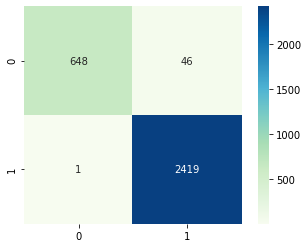

In [176]:
axes = sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.GnBu)

# explore wrong predictions

In [274]:
counter = 0
wrong_predictions = 0
for state, county, prediction, label in zip( X_test.STATE, X_test.COUNTY, predictions, y_test):
    if prediction != label:
        wrong_predictions +=1
        print('state={}, county={},    prediction={},    expected={}'.format(state, county, prediction, label))
    counter += 1
   
print('total_rows={}'.format(counter))
print('total_wrong_predictions={}'.format(wrong_predictions))

state=5, county=147,    prediction=1,    expected=0
state=8, county=15,    prediction=1,    expected=0
state=8, county=111,    prediction=1,    expected=0
state=12, county=65,    prediction=1,    expected=0
state=13, county=7,    prediction=1,    expected=0
state=13, county=239,    prediction=1,    expected=0
state=17, county=15,    prediction=1,    expected=0
state=17, county=85,    prediction=1,    expected=0
state=17, county=155,    prediction=1,    expected=0
state=19, county=39,    prediction=1,    expected=0
state=19, county=115,    prediction=1,    expected=0
state=19, county=131,    prediction=1,    expected=0
state=21, county=63,    prediction=1,    expected=0
state=24, county=3,    prediction=0,    expected=1
state=26, county=159,    prediction=1,    expected=0
state=27, county=23,    prediction=1,    expected=0
state=27, county=69,    prediction=1,    expected=0
state=27, county=73,    prediction=1,    expected=0
state=27, county=155,    prediction=1,    expected=0
state=28,